# Predicting the Sale Price of Bulldozers Using ML

## 1. Problem Definition

> Can we predict the saling price of bulldozers, given its characteristics along with the previous sales price of similar bulldozers

## 2. Data

Data is provided on Kaggle on the Blue Book for Bulldozers: https://www.kaggle.com/c/bluebook-for-bulldozers/data

The data is split into three sets:
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

## 4. Features 

Information regarding the features data can be found here: https://docs.google.com/spreadsheets/d/17MmkJk_d1ifBcNKMpNhOM8PbCZ7FzoV35RWRhUkLexU/edit?usp=sharing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style = 'whitegrid', font_scale = 1.2)

In [2]:
df = pd.read_csv('bluebook-for-bulldozers/TrainAndValid.csv', low_memory = False)
df.shape

(412698, 53)

In [3]:
test = pd.read_csv('bluebook-for-bulldozers/Test.csv')
test.shape

(12457, 52)

### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [6]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


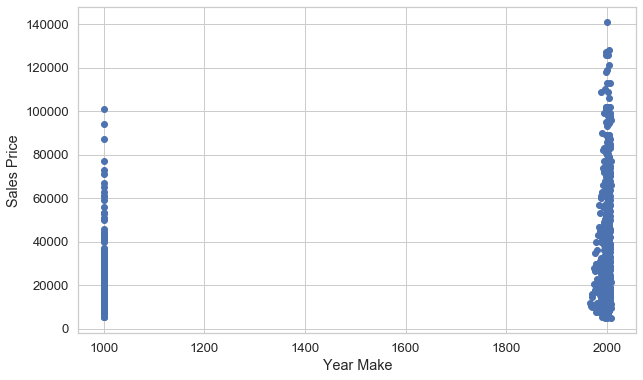

In [7]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df['YearMade'][:1000], df['SalePrice'][:1000])
ax.set_xlabel('Year Make')
ax.set_ylabel('Sales Price');

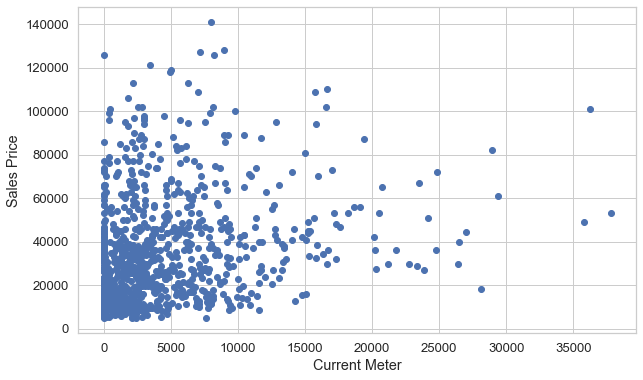

In [8]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df['MachineHoursCurrentMeter'][:1000], df['SalePrice'][:1000])
ax.set_xlabel('Current Meter')
ax.set_ylabel('Sales Price');

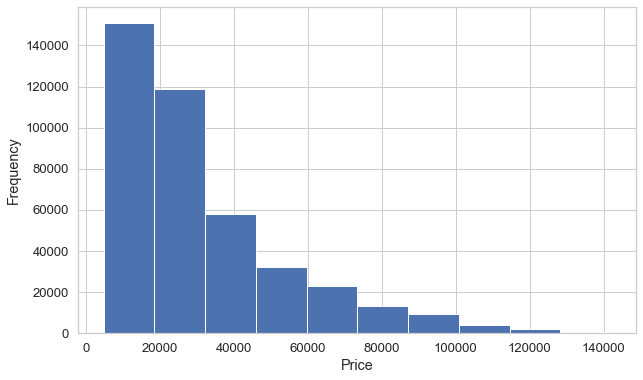

In [9]:
df['SalePrice'].plot(kind = 'hist', figsize = (10,6))
plt.xlabel('Price');

In [10]:
df['UsageBand'].value_counts()

Medium    35832
Low       25311
High      12527
Name: UsageBand, dtype: int64

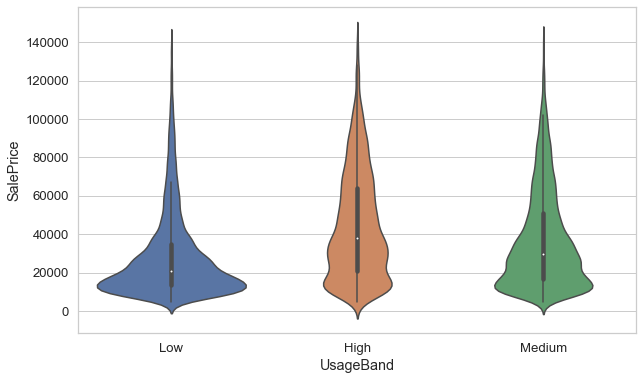

In [11]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'UsageBand', y = 'SalePrice', data = df);

In [12]:
df['Steering_Controls'].value_counts()

Conventional           70774
Command Control          594
Four Wheel Standard      139
Wheel                     14
No                         1
Name: Steering_Controls, dtype: int64

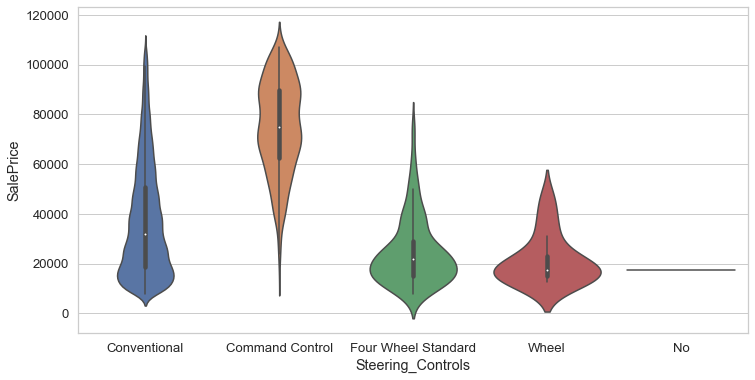

In [13]:
plt.figure(figsize=(12,6))
sns.violinplot('Steering_Controls', 'SalePrice', data = df);

In [14]:
# Average Sale Price given the Steering Controls
df[['Steering_Controls', 'SalePrice']].groupby(['Steering_Controls'], as_index = False).mean()

,Steering_Controls,SalePrice
0,Command Control,74774.410774
1,Conventional,37168.659098
2,Four Wheel Standard,24658.273381
3,No,17500.000000
4,Wheel,21517.857143


In [15]:
df['Blade_Type'].value_counts()

PAT                    39633
Straight               13461
None or Unspecified    11841
Semi U                  8907
VPAT                    3681
U                       1888
Angle                   1684
No                       743
Landfill                  26
Coal                      11
Name: Blade_Type, dtype: int64

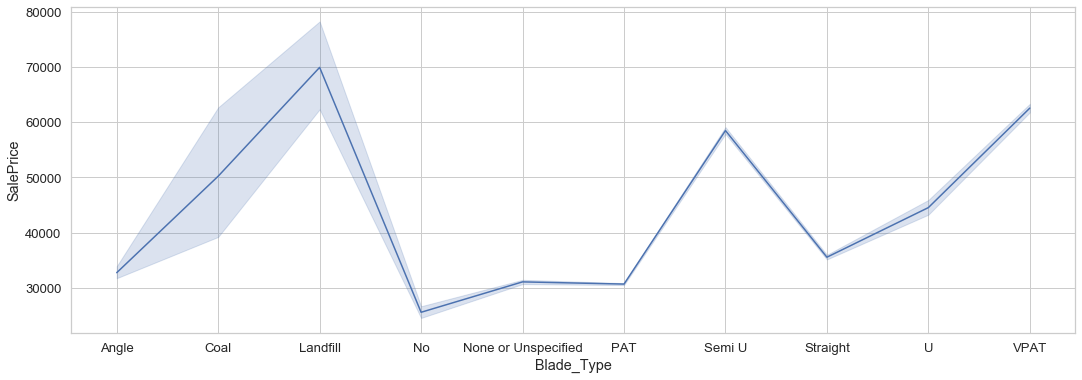

In [16]:
#plt.figure(figsize = (10,6))
#sns.violinplot('Blade_Type', 'SalePrice', data = df);
fig, ax = plt.subplots(figsize = (18,6))
ax = sns.lineplot('Blade_Type', 'SalePrice', data = df);

In [17]:
df['auctioneerID'].value_counts()

1.0     192773
2.0      57441
3.0      30288
4.0      20877
99.0     12042
6.0      11950
7.0       7847
8.0       7419
5.0       7002
10.0      5876
9.0       4764
11.0      3823
12.0      3610
13.0      3068
18.0      2359
14.0      2277
20.0      2238
19.0      2074
16.0      1807
15.0      1742
21.0      1601
22.0      1429
24.0      1357
23.0      1322
17.0      1275
27.0      1150
25.0       959
28.0       860
26.0       796
0.0        536
Name: auctioneerID, dtype: int64

In [18]:
df['saledate'].dtype

dtype('O')

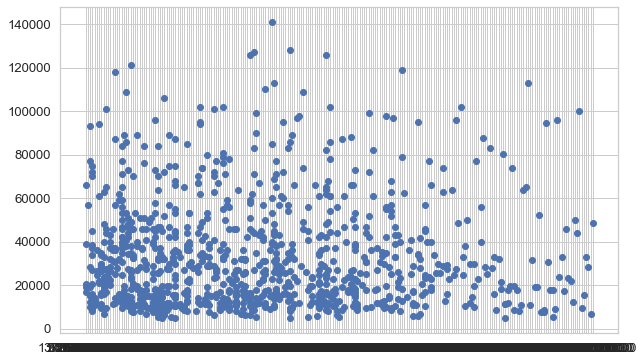

In [19]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);  ## The X-axis is nonsense

In [20]:
df = pd.read_csv('bluebook-for-bulldozers/TrainAndValid.csv',
                low_memory = False, parse_dates = ['saledate'])
test = pd.read_csv('bluebook-for-bulldozers/Test.csv', parse_dates = ['saledate'])

In [21]:
df['saledate'].dtype

dtype('<M8[ns]')

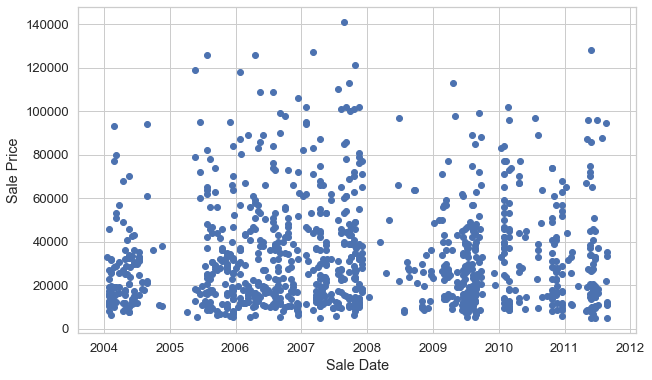

In [22]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])
ax.set(xlabel = 'Sale Date', ylabel = 'Sale Price');

It's difficult to tell which features help determine the SalePrice

In [23]:
### Copy of the dataframes
df_copy = df.copy()
test_copy = test.copy()

In [24]:
df_copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_copy['saledate'].head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

In [26]:
df_copy.isna().sum()/len(df_copy)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
saledate                    0.000000
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
T

## Preprocess Data

Fill in a value for null values as well as change data types

In [27]:
def preprocess_data(dataframe):
    """
    Transforms the dataframe and returns it
    """
    dataframe['saleYear'] = dataframe['saledate'].dt.year
    dataframe['saleMonth'] = dataframe['saledate'].dt.month
    dataframe['saleDay'] = dataframe['saledate'].dt.day
    dataframe['saleDayOfWeek'] = dataframe['saledate'].dt.dayofweek
    dataframe['saleDayOfYear'] = dataframe['saledate'].dt.dayofyear
    
    dataframe.drop('saledate', axis = 1, inplace = True)
    
    # Remove null values and/or change string column into categorical
    for label, content in dataframe.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column indicating if data was missing or not
                dataframe[label + '_is_missing'] = pd.isnull(content)
                # Fill missing numeric values with median
                dataframe[label] = content.fillna(content.median())
        
        # Change string dtypes to categorical
        if not pd.api.types.is_numeric_dtype(content):
            # Add a binary column indicating if data was missing or not
            dataframe[label + '_is_missing'] = pd.isnull(content)
            # Change categorical to numeric and add 1
            dataframe[label] = pd.Categorical(content).codes+1
            
    return dataframe

In [28]:
df_copy = preprocess_data(df_copy)
test_copy = preprocess_data(test_copy)

In [29]:
df_copy.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,True
Blade_Type_is_missing,True,True,True,True,True
Travel_Controls_is_missing,True,True,True,True,True
Differential_Type_is_missing,False,False,True,True,True


In [30]:
test_copy.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,False
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True


In [31]:
df_copy.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

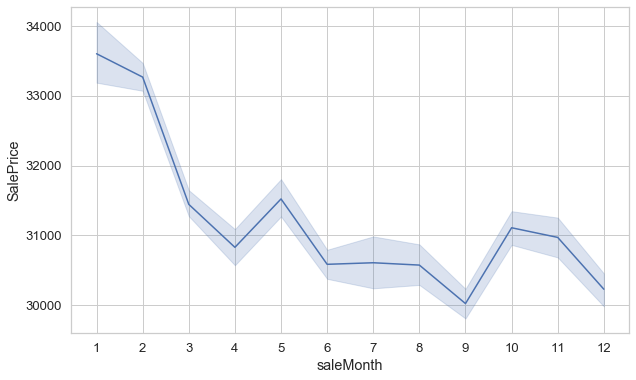

In [32]:
plt.figure(figsize = (10,6))
sns.lineplot('saleMonth', 'SalePrice', data = df_copy)
plt.xticks(np.arange(1,13));

## Creating Training and Validation Set

In [33]:
df_valid = df_copy[df_copy['saleYear'] == 2012]
df_train = df_copy[df_copy['saleYear'] < 2012]

In [34]:
X_train, y_train = df_train.drop('SalePrice', axis = 1), df_train['SalePrice']
X_valid, y_valid = df_valid.drop('SalePrice', axis = 1), df_valid['SalePrice']

In [35]:
from sklearn.model_selection import RandomizedSearchCV 

### Building an Evaluation Function

Since Evaluation metric is RMSLE, we will build a RMSLE model

In [36]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculate and return RMSLE between y_test and y_preds
    """
    return np.sqrt(mean_squared_log_error(np.absolute(y_test), np.absolute(y_preds)))

def show_scores(model):
    """
    Calculate model on a few different metrics
    """
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    
    scores = {
        'Training MAE': mean_absolute_error(y_train, train_preds),
        'Valid MAE': mean_absolute_error(y_valid, valid_preds),
        'Training RMSLE': rmsle(y_train, train_preds),
        'Valid RMSLE': rmsle(y_valid, valid_preds),
        'Training R^2': r2_score(y_train, train_preds),
        'Valid R^2': r2_score(y_valid, valid_preds)
    }
    
    return scores

## RandomForestRegressor

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rfr = RandomForestRegressor(n_jobs = -1, random_state = 23)
rfr.fit(df_copy.drop('SalePrice', axis = 1), df['SalePrice'])
rfr.score(df_copy.drop('SalePrice', axis = 1), df['SalePrice'])

0.9875545211283627

### Testing the Model

In [39]:
rfr = RandomForestRegressor(n_jobs = -1, random_state = 23, max_samples = 1000)

In [40]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=1000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=23, verbose=0, warm_start=False)

In [41]:
show_scores(rfr) # These metrics are terrible since we're only testing on a subset of the data

{'Training MAE': 7615.275727117482,
 'Valid MAE': 9164.30776980904,
 'Training RMSLE': 0.3394622946107716,
 'Valid RMSLE': 0.37600462476418767,
 'Training R^2': 0.7596899236732094,
 'Valid R^2': 0.75156374725783}

### Different HyperParameters for RandomForestRegressor

In [42]:
rfr_param = {'n_estimators': np.arange(35,101),
            'min_samples_leaf': [1,2,3],
            'min_samples_split': np.arange(2,18,2),
            'max_features': ['auto', 'sqrt', 0.5],
            'max_samples': [None]}

In [43]:
rfr_random = RandomizedSearchCV(rfr, rfr_param, n_iter = 5, n_jobs = -1, cv = 5, random_state = 23)
rfr_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=1000,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [44]:
rfr_random.best_params_

{'n_estimators': 95,
 'min_samples_split': 14,
 'min_samples_leaf': 3,
 'max_samples': None,
 'max_features': 'auto'}

In [47]:
random = RandomForestRegressor(n_estimators = 95, 
                               min_samples_split = 14,
                               min_samples_leaf = 3,
                               max_samples = None,
                               max_features = 'auto',
                               n_jobs = -1,
                               random_state=23)
random.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=95, n_jobs=-1, oob_score=False,
                      random_state=23, verbose=0, warm_start=False)

In [48]:
show_scores(random)

{'Training MAE': 2993.30643658612,
 'Valid MAE': 6061.9877780394345,
 'Training RMSLE': 0.14900487125880993,
 'Valid RMSLE': 0.2499357642373709,
 'Training R^2': 0.9548823620208327,
 'Valid R^2': 0.8738067122976526}

In [49]:
model = RandomForestRegressor(n_estimators = 40,
                              min_samples_leaf = 1,
                              min_samples_split = 14,
                              max_features = 0.5,
                              n_jobs = -1,
                              max_samples= None,
                              random_state = 23)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=False,
                      random_state=23, verbose=0, warm_start=False)

In [50]:
show_scores(model)

{'Training MAE': 2952.2399449805666,
 'Valid MAE': 5953.488624382125,
 'Training RMSLE': 0.1445229863603856,
 'Valid RMSLE': 0.24583294778671827,
 'Training R^2': 0.9589475505379019,
 'Valid R^2': 0.8819314914087614}

### Feature Importance of RandomForestRegression

In [51]:
def plot_importance(columns, importance, n = 15):
    df = (pd.DataFrame({'features': columns,
                      'feature_importance': importance})
        .sort_values('feature_importance', ascending = False)
        .reset_index(drop = True))
    
    fig, ax = plt.subplots(figsize = (10,6))
    ax.barh(df['features'][:n], df['feature_importance'][:n])
    ax.set(ylabel = 'Features', xlabel = 'Feature Importance')
    ax.invert_yaxis()

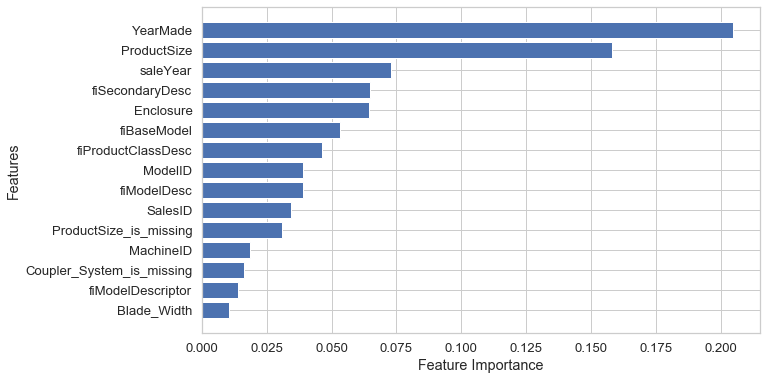

In [52]:
plot_importance(X_train.columns, model.feature_importances_)

## XGBRegressor

In [53]:
from xgboost import XGBRegressor

In [54]:
xgb = XGBRegressor(n_jobs = -1, random_state = 23)
xgb.fit(df_copy.drop('SalePrice', axis = 1), df['SalePrice'])
xgb.score(df_copy.drop('SalePrice', axis = 1), df['SalePrice'])

[11:23:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.7659631874542381

In [55]:
xgb = XGBRegressor(n_jobs = -1, random_state = 23, max_samples = 1000)
xgb.fit(X_train, y_train)

[11:24:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, max_samples=1000, min_child_weight=1, missing=None,
             n_estimators=100, n_jobs=-1, nthread=None, objective='reg:linear',
             random_state=23, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [56]:
show_scores(xgb)

{'Training MAE': 7584.159046774822,
 'Valid MAE': 9007.261545410789,
 'Training RMSLE': 0.3450694416335361,
 'Valid RMSLE': 0.37302868730934763,
 'Training R^2': 0.7635529695236615,
 'Valid R^2': 0.7561614835644601}

## CatBoostRegressor

In [57]:
from catboost import CatBoostRegressor

In [58]:
cat = CatBoostRegressor()
cat.fit(X_train, y_train)

Learning rate set to 0.113445
0:	learn: 21722.9014222	total: 158ms	remaining: 2m 37s
1:	learn: 20591.5070833	total: 240ms	remaining: 1m 59s
2:	learn: 19686.7562360	total: 311ms	remaining: 1m 43s
3:	learn: 18876.4098600	total: 393ms	remaining: 1m 37s
4:	learn: 18205.9273072	total: 479ms	remaining: 1m 35s
5:	learn: 17620.5948034	total: 552ms	remaining: 1m 31s
6:	learn: 17081.7901660	total: 650ms	remaining: 1m 32s
7:	learn: 16619.4461873	total: 708ms	remaining: 1m 27s
8:	learn: 16218.9543582	total: 783ms	remaining: 1m 26s
9:	learn: 15854.2610190	total: 850ms	remaining: 1m 24s
10:	learn: 15491.1985247	total: 930ms	remaining: 1m 23s
11:	learn: 15171.0883460	total: 993ms	remaining: 1m 21s
12:	learn: 14894.6836521	total: 1.07s	remaining: 1m 21s
13:	learn: 14625.1109764	total: 1.17s	remaining: 1m 22s
14:	learn: 14403.1905664	total: 1.25s	remaining: 1m 22s
15:	learn: 14218.1271747	total: 1.32s	remaining: 1m 21s
16:	learn: 14031.3199536	total: 1.41s	remaining: 1m 21s
17:	learn: 13859.0211018	tot

149:	learn: 9170.6244468	total: 10.3s	remaining: 58.1s
150:	learn: 9161.8551841	total: 10.3s	remaining: 58.2s
151:	learn: 9153.5585974	total: 10.4s	remaining: 58.1s
152:	learn: 9141.6354614	total: 10.5s	remaining: 58.1s
153:	learn: 9129.5447902	total: 10.6s	remaining: 58.2s
154:	learn: 9118.3084905	total: 10.7s	remaining: 58.1s
155:	learn: 9109.9372949	total: 10.7s	remaining: 58.1s
156:	learn: 9099.1186782	total: 10.8s	remaining: 58s
157:	learn: 9090.8289039	total: 10.9s	remaining: 57.9s
158:	learn: 9081.7835005	total: 10.9s	remaining: 57.8s
159:	learn: 9071.7503178	total: 11s	remaining: 57.6s
160:	learn: 9063.1665188	total: 11s	remaining: 57.5s
161:	learn: 9053.5371827	total: 11.1s	remaining: 57.4s
162:	learn: 9048.3455193	total: 11.2s	remaining: 57.5s
163:	learn: 9043.7199432	total: 11.3s	remaining: 57.5s
164:	learn: 9035.0663338	total: 11.3s	remaining: 57.4s
165:	learn: 9026.9533518	total: 11.4s	remaining: 57.4s
166:	learn: 9016.6435718	total: 11.5s	remaining: 57.4s
167:	learn: 9012

302:	learn: 8294.6667619	total: 22.4s	remaining: 51.5s
303:	learn: 8292.3215364	total: 22.5s	remaining: 51.4s
304:	learn: 8288.7637494	total: 22.5s	remaining: 51.4s
305:	learn: 8284.1563714	total: 22.6s	remaining: 51.2s
306:	learn: 8277.4953320	total: 22.7s	remaining: 51.2s
307:	learn: 8274.2912533	total: 22.7s	remaining: 51.1s
308:	learn: 8271.7075645	total: 22.8s	remaining: 51s
309:	learn: 8269.0671606	total: 22.9s	remaining: 50.9s
310:	learn: 8265.7626404	total: 22.9s	remaining: 50.8s
311:	learn: 8262.2670332	total: 23s	remaining: 50.7s
312:	learn: 8259.5698317	total: 23.1s	remaining: 50.6s
313:	learn: 8257.1964593	total: 23.1s	remaining: 50.5s
314:	learn: 8254.2219674	total: 23.2s	remaining: 50.4s
315:	learn: 8251.1208053	total: 23.2s	remaining: 50.3s
316:	learn: 8245.5648292	total: 23.3s	remaining: 50.2s
317:	learn: 8241.9145142	total: 23.4s	remaining: 50.1s
318:	learn: 8239.0493495	total: 23.4s	remaining: 50s
319:	learn: 8236.3257291	total: 23.5s	remaining: 49.9s
320:	learn: 8231

454:	learn: 7875.2518653	total: 32.2s	remaining: 38.6s
455:	learn: 7873.3634712	total: 32.3s	remaining: 38.6s
456:	learn: 7871.8128580	total: 32.4s	remaining: 38.5s
457:	learn: 7870.5030356	total: 32.4s	remaining: 38.4s
458:	learn: 7869.5929919	total: 32.5s	remaining: 38.3s
459:	learn: 7866.9481459	total: 32.6s	remaining: 38.2s
460:	learn: 7864.2233451	total: 32.7s	remaining: 38.2s
461:	learn: 7862.2838062	total: 32.7s	remaining: 38.1s
462:	learn: 7860.2320588	total: 32.8s	remaining: 38s
463:	learn: 7858.5653635	total: 32.9s	remaining: 38s
464:	learn: 7856.1514031	total: 32.9s	remaining: 37.9s
465:	learn: 7855.0540297	total: 33s	remaining: 37.8s
466:	learn: 7852.4956196	total: 33.1s	remaining: 37.7s
467:	learn: 7851.3259344	total: 33.1s	remaining: 37.7s
468:	learn: 7849.5218761	total: 33.2s	remaining: 37.6s
469:	learn: 7848.0656113	total: 33.3s	remaining: 37.5s
470:	learn: 7847.0715427	total: 33.3s	remaining: 37.4s
471:	learn: 7844.1657989	total: 33.4s	remaining: 37.3s
472:	learn: 7842

606:	learn: 7624.3169384	total: 42.8s	remaining: 27.7s
607:	learn: 7622.7988422	total: 42.9s	remaining: 27.6s
608:	learn: 7620.8412350	total: 42.9s	remaining: 27.6s
609:	learn: 7620.0478033	total: 43s	remaining: 27.5s
610:	learn: 7619.2160327	total: 43.1s	remaining: 27.4s
611:	learn: 7617.4039952	total: 43.1s	remaining: 27.3s
612:	learn: 7616.2691607	total: 43.2s	remaining: 27.3s
613:	learn: 7614.8910736	total: 43.3s	remaining: 27.2s
614:	learn: 7613.2129845	total: 43.3s	remaining: 27.1s
615:	learn: 7612.2285581	total: 43.4s	remaining: 27.1s
616:	learn: 7611.2626020	total: 43.5s	remaining: 27s
617:	learn: 7609.8736097	total: 43.5s	remaining: 26.9s
618:	learn: 7608.9599057	total: 43.6s	remaining: 26.8s
619:	learn: 7607.7774833	total: 43.7s	remaining: 26.8s
620:	learn: 7606.9769816	total: 43.7s	remaining: 26.7s
621:	learn: 7605.3183269	total: 43.8s	remaining: 26.6s
622:	learn: 7604.2072808	total: 43.9s	remaining: 26.5s
623:	learn: 7603.2909022	total: 43.9s	remaining: 26.5s
624:	learn: 76

760:	learn: 7444.2504763	total: 54.3s	remaining: 17s
761:	learn: 7443.4872086	total: 54.3s	remaining: 17s
762:	learn: 7442.1216460	total: 54.4s	remaining: 16.9s
763:	learn: 7440.7874620	total: 54.5s	remaining: 16.8s
764:	learn: 7440.0097130	total: 54.5s	remaining: 16.8s
765:	learn: 7438.8915816	total: 54.6s	remaining: 16.7s
766:	learn: 7438.1301192	total: 54.7s	remaining: 16.6s
767:	learn: 7437.5782338	total: 54.8s	remaining: 16.5s
768:	learn: 7436.9402215	total: 54.8s	remaining: 16.5s
769:	learn: 7436.0758253	total: 54.9s	remaining: 16.4s
770:	learn: 7435.2202183	total: 55s	remaining: 16.3s
771:	learn: 7434.1637519	total: 55s	remaining: 16.3s
772:	learn: 7432.3921235	total: 55.1s	remaining: 16.2s
773:	learn: 7431.4177908	total: 55.2s	remaining: 16.1s
774:	learn: 7430.1548613	total: 55.3s	remaining: 16.1s
775:	learn: 7429.2292146	total: 55.4s	remaining: 16s
776:	learn: 7428.3312487	total: 55.4s	remaining: 15.9s
777:	learn: 7427.2316724	total: 55.5s	remaining: 15.8s
778:	learn: 7426.378

913:	learn: 7305.2639030	total: 1m 4s	remaining: 6.04s
914:	learn: 7304.6748158	total: 1m 4s	remaining: 5.97s
915:	learn: 7303.2359156	total: 1m 4s	remaining: 5.9s
916:	learn: 7302.0626008	total: 1m 4s	remaining: 5.83s
917:	learn: 7301.2484393	total: 1m 4s	remaining: 5.76s
918:	learn: 7300.6148233	total: 1m 4s	remaining: 5.69s
919:	learn: 7300.1918399	total: 1m 4s	remaining: 5.62s
920:	learn: 7299.4594525	total: 1m 4s	remaining: 5.54s
921:	learn: 7298.4054188	total: 1m 4s	remaining: 5.47s
922:	learn: 7297.9176200	total: 1m 4s	remaining: 5.4s
923:	learn: 7297.2502954	total: 1m 4s	remaining: 5.33s
924:	learn: 7296.5381604	total: 1m 4s	remaining: 5.27s
925:	learn: 7295.7787262	total: 1m 5s	remaining: 5.2s
926:	learn: 7295.1691372	total: 1m 5s	remaining: 5.13s
927:	learn: 7294.8112802	total: 1m 5s	remaining: 5.05s
928:	learn: 7294.1503189	total: 1m 5s	remaining: 4.99s
929:	learn: 7293.3985982	total: 1m 5s	remaining: 4.91s
930:	learn: 7292.3492900	total: 1m 5s	remaining: 4.84s
931:	learn: 7

In [59]:
show_scores(cat)

{'Training MAE': 4778.2262138731785,
 'Valid MAE': 6109.156327860033,
 'Training RMSLE': 0.23986349919880076,
 'Valid RMSLE': 0.2592530783837846,
 'Training R^2': 0.9013167113130525,
 'Valid R^2': 0.8790123668270351}

## Choice: RandomForestRegressor

CatBoost offers a promising RMSLE score, but we'll choose RandomForestRegressor model

In [62]:
test_copy.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,False
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True


In [63]:
# Find the difference between the columns for the two dataframes
set(X_train) - set(test_copy)

{'auctioneerID_is_missing'}

In [64]:
# Manually set auctioneerID_is_missing column to false in test_copy
test_copy['auctioneerID_is_missing'] = False

In [65]:
test_copy.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [66]:
y_preds = model.predict(test_copy)

In [67]:
y_preds

array([20636.62529816, 17404.37169294, 45763.97874709, ...,
       16053.24578136, 19962.43046078, 28889.36861816])

In [72]:
df_submit = pd.DataFrame()
df_submit['SalesID'] = test_copy['SalesID']
df_submit['SalePrice'] = np.round(y_preds,2)

In [73]:
df_submit

,SalesID,SalePrice
0,1227829,20636.63
1,1227844,17404.37
2,1227847,45763.98
3,1227848,63071.71
4,1227863,48128.11
...,...,...
12452,6643171,43925.00
12453,6643173,14913.72
12454,6643184,16053.25
12455,6643186,19962.43


In [74]:
df_submit.to_csv('bluebook-for-bulldozers/Predicted-Sales-Price.csv', index = False)